# import libraries


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression


In [4]:
house_data=pd.read_csv('C:/Users/manar/Downloads/Datasets/kc_house_data.csv')

In [5]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis


In [8]:
house_data.shape

(21613, 21)

In [7]:
#information about dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
#statisitcal analysis
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [10]:
house_data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [11]:
#check the duplicate values
house_data.duplicated().sum()

0

In [12]:
#check for datatypes
house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# The Correlation between the features and target

In [13]:
corr=house_data.corr()

<AxesSubplot:>

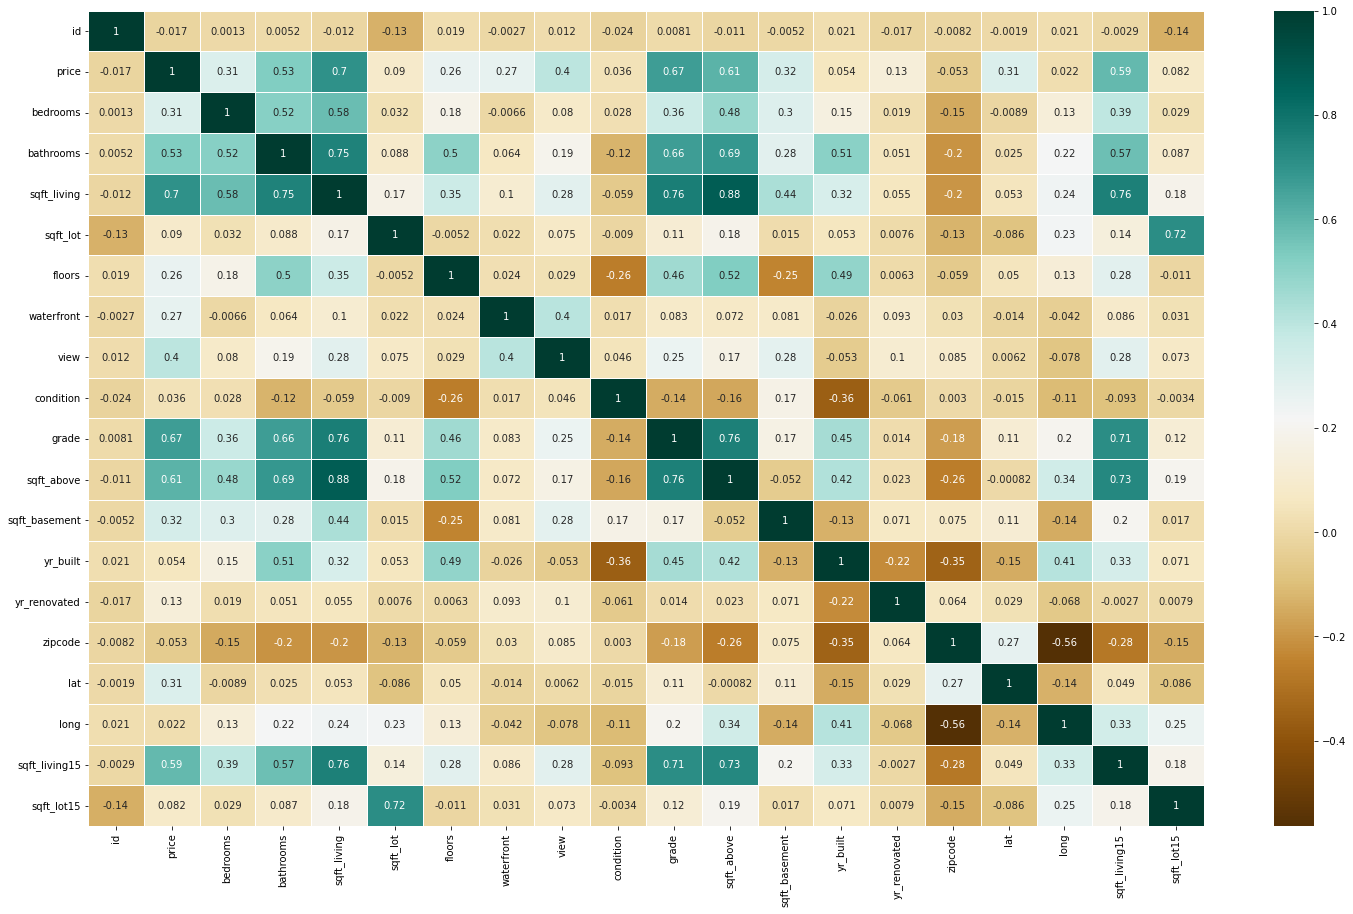

In [14]:
plt.figure(figsize=(25,15))
sns.heatmap(corr, cmap = 'BrBG', linecolor = 'white', linewidth = 1, annot=True)

# Data Visualization

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

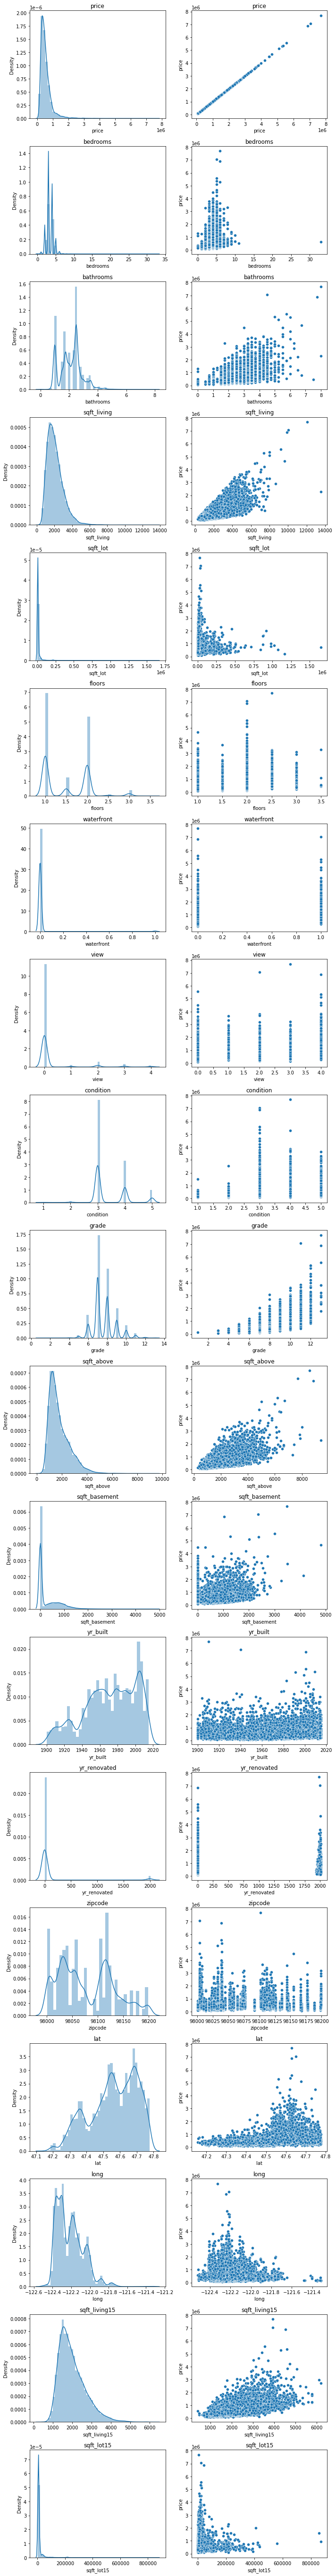

In [15]:
#check for distribution of the dataset
features=[feature for feature in house_data.columns if feature not in ['id','date']]
fig,axes=plt.subplots(nrows=len(features),ncols=2,figsize=(10,4*len(features)))
for i,col in enumerate(features):
    sns.distplot(house_data[col],ax=axes[i,0])
    axes[i,0].set_title(col)
    sns.scatterplot(x=house_data[col],y='price',data=house_data,ax=axes[i,1])
    axes[i,1].set_title(col)
plt.tight_layout()
plt.show()

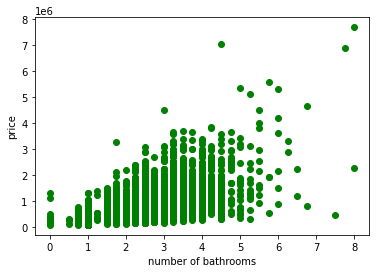

In [16]:
#the relation between number of bathrooms and price
npbedrooms=house_data['bedrooms'].to_numpy()
npbathrooms=house_data['bathrooms'].to_numpy()
npprice=house_data['price'].to_numpy()
plt.scatter(npbathrooms,npprice,c='green')
plt.xlabel('number of bathrooms')
plt.ylabel('price')
plt.show()

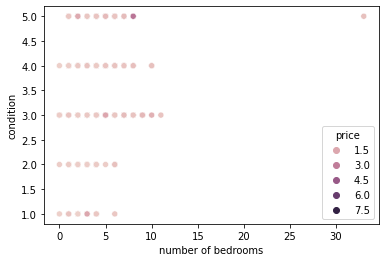

In [17]:
#relation between number of bedrooms and number of conditions with the price
sns.scatterplot(x='bedrooms',y='condition',hue='price',data=house_data)
plt.xlabel('number of bedrooms')
plt.ylabel('condition')
plt.show()

# Data Preprocessing

In [18]:
#check for missing value
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Split the features and target

In [19]:
X=house_data.drop(['price','id','date'],axis=1)
Y=house_data['price']

# Feature Scaling

In [20]:
scaler=StandardScaler()
newX=scaler.fit_transform(X)
print(newX)

[[-0.39873715 -1.44746357 -0.97983502 ... -0.30607896 -0.9433552
  -0.26071541]
 [-0.39873715  0.1756067   0.53363434 ... -0.74634143 -0.43268619
  -0.18786773]
 [-1.47395936 -1.44746357 -1.42625404 ... -0.13565477  1.07013975
  -0.17237524]
 ...
 [-1.47395936 -1.77207762 -1.15404732 ... -0.60432128 -1.41025258
  -0.39414129]
 [-0.39873715  0.50022075 -0.52252773 ...  1.02891048 -0.8412214
  -0.42051149]
 [-1.47395936 -1.77207762 -1.15404732 ... -0.60432128 -1.41025258
  -0.41794772]]


# Split the training and test data

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
print(x_train.shape,X.shape,x_test.shape)

(15129, 18) (21613, 18) (6484, 18)


# Training using Linear Regression model

In [22]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Evaluate the model and get the accuarcy

In [23]:
test_prediction=model.predict(x_test)
#r2_score,mean_squared_error
score1=r2_score(y_test,test_prediction)
score2=mean_squared_error(y_test,test_prediction)
print("the score using root square error is: ",score1)

the score using root square error is:  0.7019457714827447


# Predict a real sample

In [24]:
input_data=[3,1.5,1970,3400,1.5,0,0,4,8,1420,550,1929,0,98122,47.6163,-122.292,1940,4000]
npinput_data=np.asarray(input_data)
reshaped_data=npinput_data.reshape(1,-1)
prediction=model.predict(reshaped_data)
print("the price of this house is :",prediction[0])

the price of this house is : 669921.2341076722


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
